<a href="https://colab.research.google.com/github/KhyatiMahendru/LossFunctions/blob/master/UnderstandingLossFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Regression Loss

In [59]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.feature_names)
print(boston_dataset.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [0]:
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['MedianVal'] = boston_dataset.target

In [61]:
X = data['RM'].as_matrix().reshape(-1, 1)
Y = data['MedianVal'].as_matrix().reshape(-1, 1)
N = len(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


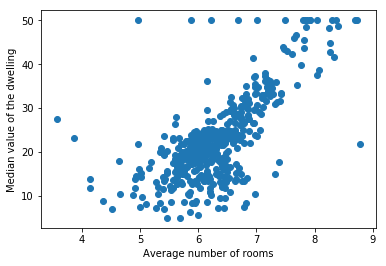

In [62]:
plt.scatter(X, Y)
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of the dwelling')
plt.show()

## 1. Mean Square Error Loss

In [0]:
def update_weights_MSE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

In [0]:
# alpha = 0.0001
MSEloss1 = []
m1 = 0.001
b1 = 0
learning_rate = 0.0001
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += (Y[i] - m1 * X[i] - b1) ** 2
  curr_loss /= float(N)
  MSEloss1.append(curr_loss)
  m1, b1 = update_weights_MSE(m1, b1, X, Y, learning_rate)

In [0]:
# alpha = 0.001
MSEloss2 = []
m1 = 0.001
b1 = 0
learning_rate = 0.001
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += (Y[i] - m1 * X[i] - b1) ** 2
  curr_loss /= float(N)
  MSEloss2.append(curr_loss)
  m1, b1 = update_weights_MSE(m1, b1, X, Y, learning_rate)

In [0]:
# alpha = 0.01
MSEloss3 = []
m1 = 0.001
b1 = 0
N = len(X)
learning_rate = 0.01
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += (Y[i] - m1 * X[i] - b1) ** 2
  curr_loss /= float(N)
  MSEloss3.append(curr_loss)
  m1, b1 = update_weights_MSE(m1, b1, X, Y, learning_rate)

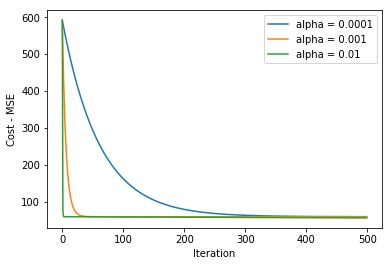

In [67]:
index = range(500)
plt.plot(index, MSEloss1, label = 'alpha = 0.0001')
plt.plot(index, MSEloss2, label = 'alpha = 0.001')
plt.plot(index, MSEloss3, label = 'alpha = 0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost - MSE')
plt.legend(loc = 'best')
plt.legend()
plt.show()

## 2. Mean Absolute Error Loss

In [0]:
def update_weights_MAE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -x(y - (mx + b)) / |mx + b|
        m_deriv += - X[i] * (Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

        # -(y - (mx + b)) / |mx + b|
        b_deriv += -(Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

In [0]:
# alpha = 0.0001
MAEloss1 = []
m2 = 0.001
b2 = 0
learning_rate = 0.0001
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += abs(Y[i] - m2 * X[i] - b2)
  curr_loss /= float(N)
  MAEloss1.append(curr_loss)
  m2, b2 = update_weights_MAE(m2, b2, X, Y, learning_rate)

In [0]:
# alpha = 0.001
MAEloss2 = []
m2 = 0.001
b2 = 0
learning_rate = 0.001
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += abs(Y[i] - m2 * X[i] - b2)
  curr_loss /= float(N)
  MAEloss2.append(curr_loss)
  m2, b2 = update_weights_MAE(m2, b2, X, Y, learning_rate)

In [0]:
# alpha = 0.01
MAEloss3 = []
m2 = 0.001
b2 = 0
learning_rate = 0.01
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    curr_loss += abs(Y[i] - m2 * X[i] - b2)
  curr_loss /= float(N)
  MAEloss3.append(curr_loss)
  m2, b2 = update_weights_MAE(m2, b2, X, Y, learning_rate)

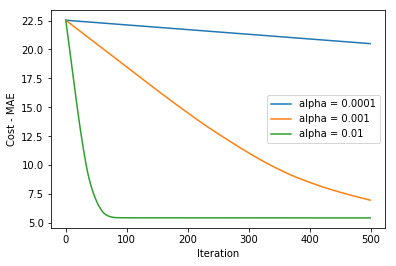

In [72]:
index = range(500)
plt.plot(index, MAEloss1, label = 'alpha = 0.0001')
plt.plot(index, MAEloss2, label = 'alpha = 0.001')
plt.plot(index, MAEloss3, label = 'alpha = 0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost - MAE')
plt.legend(loc = 'best')
plt.legend()
plt.show()

## 3. Huber Loss

In [0]:
def update_weights_Huber(m, b, X, Y, delta, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # derivative of quadratic for small values and of linear for large values
        if abs(Y[i] - m*X[i] - b) <= delta:
          m_deriv += -X[i] * (Y[i] - (m*X[i] + b))
          b_deriv += - (Y[i] - (m*X[i] + b))
        else:
          m_deriv += delta * X[i] * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
          b_deriv += delta * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
    
    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

In [0]:
# delta = 20
Huberloss1 = []
m3 = 0.001
b3 = 0
learning_rate = 0.0001
delta = 20
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    if abs(Y[i] - m3*X[i] - b3) <= delta:
      curr_loss += ((Y[i] - m3 * X[i] - b3) ** 2) / 2
    else:
      curr_loss += delta * abs(Y[i] - m3 * X[i] - b3) - (delta ** 2) / N
  curr_loss /= float(N)
  Huberloss1.append(curr_loss)
  m3, b3 = update_weights_Huber(m3, b3, X, Y, delta, learning_rate)

In [0]:
# delta = 10
Huberloss2 = []
m3 = 0.001
b3 = 0
learning_rate = 0.0001
delta = 10
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    if abs(Y[i] - m3*X[i] - b3) <= delta:
      curr_loss += ((Y[i] - m3 * X[i] - b3) ** 2) / 2
    else:
      curr_loss += delta * abs(Y[i] - m3 * X[i] - b3) - (delta ** 2) / N
  curr_loss /= float(N)
  Huberloss2.append(curr_loss)
  m3, b3 = update_weights_Huber(m3, b3, X, Y, delta, learning_rate)

In [0]:
# delta = 5
Huberloss3 = []
m3 = 0.001
b3 = 0
learning_rate = 0.0001
delta = 5
for iter in range(0, 500):
  curr_loss = 0
  for i in range(0, N):
    if abs(Y[i] - m3*X[i] - b3) <= delta:
      curr_loss += ((Y[i] - m3 * X[i] - b3) ** 2) / 2
    else:
      curr_loss += delta * abs(Y[i] - m3 * X[i] - b3) - (delta ** 2) / N
  curr_loss /= float(N)
  Huberloss3.append(curr_loss)
  m3, b3 = update_weights_Huber(m3, b3, X, Y, delta, learning_rate)

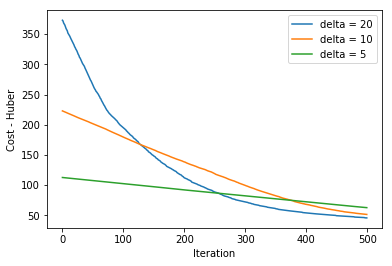

In [77]:
index = range(500)
plt.plot(index, Huberloss1, label = 'delta = 20')
plt.plot(index, Huberloss2, label = 'delta = 10')
plt.plot(index, Huberloss3, label = 'delta = 5')
plt.xlabel('Iteration')
plt.ylabel('Cost - Huber')
plt.legend(loc = 'best')
plt.legend()
plt.show()

## Binary Classification Loss

In [78]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print(cancer_dataset.feature_names)
print(cancer_dataset.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
    

In [79]:
print(cancer_dataset.target_names)

['malignant' 'benign']


Class 0 - Malignant, Class 1 - Benign

In [80]:
data1 = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
data1['Class'] = cancer_dataset.target
print(cancer_dataset.target_names)
print(data1.head())

['malignant' 'benign']
   mean radius  mean texture  ...  worst fractal dimension  Class
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0

[5 rows x 31 columns]


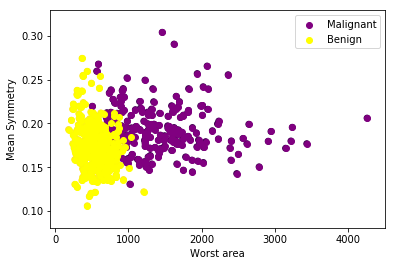

In [81]:
plt.scatter(data1['worst area'], data1['mean symmetry'], c = data1['Class'])
malignant = plt.scatter(data1[data1['Class'] == 0]['worst area'], data1[data1['Class'] == 0]['mean symmetry'], color = 'purple')
benign = plt.scatter(data1[data1['Class'] == 1]['worst area'], data1[data1['Class'] == 1]['mean symmetry'], color = 'yellow')
plt.legend((malignant, benign),
           ('Malignant', 'Benign'),
           scatterpoints=1,
           loc='best',
           )
plt.xlabel('Worst area')
plt.ylabel('Mean Symmetry')
plt.show()

In [82]:
X1 = data1['worst area'].as_matrix().reshape(-1, 1)
X2 = data1['mean symmetry'].as_matrix().reshape(-1, 1)
Y = data1['Class'].as_matrix().reshape(-1, 1)
N1 = len(X1)
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# We scale the values because otherwise the parameters will be very small
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

## 1. Binary Cross-Entropy Loss

In [0]:
def update_weights_BCE(m1, m2, b, X1, X2, Y, learning_rate):
    m1_deriv = 0
    m2_deriv = 0
    b_deriv = 0
    N = len(X1)
    for i in range(N):
        s = 1 / (1 / (1 + math.exp(-m1*X1[i] - m2*X2[i] - b)))
        
        # Calculate partial derivatives
        m1_deriv += -X1[i] * (s - Y[i])
        m2_deriv += -X2[i] * (s - Y[i])
        b_deriv += -(s - Y[i])

    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m1, m2, b

In [0]:
# alpha = 0.00001
BCEloss1 = []
m4_1 = -2.5
m4_2 = -1.4
b4 = -5.6
learning_rate = 0.00001
for iter in range(0, 1000):
  curr_loss = 0
  for i in range(0, N1):
    p = 1 / (1 + math.exp(- m4_1*X1[i] - m4_2*X2[i] - b4))
    if Y[i] == 0:
      curr_loss += -math.log(1 - p)
    else:
      curr_loss += -math.log(p)
  curr_loss /= float(N1)
  BCEloss1.append(curr_loss)
  m4_1, m4_2, b4 = update_weights_BCE(m4_1, m4_2, b4, X1, X2, Y, learning_rate)

In [0]:
# alpha = 0.0001
BCEloss2 = []
m4_1 = -2.5
m4_2 = -1.4
b4 = -5.6
learning_rate = 0.0001
for iter in range(0, 1000):
  curr_loss = 0
  for i in range(0, N1):
    p = 1 / (1 + math.exp(- m4_1*X1[i] - m4_2*X2[i] - b4))
    if Y[i] == 0:
      curr_loss += -math.log(1 - p)
    else:
      curr_loss += -math.log(p)
  curr_loss /= float(N1)
  BCEloss2.append(curr_loss)
  m4_1, m4_2, b4 = update_weights_BCE(m4_1, m4_2, b4, X1, X2, Y, learning_rate)

In [0]:
# alpha = 0.001
BCEloss3 = []
m4_1 = -2.5
m4_2 = -1.4
b4 = -5.6
learning_rate = 0.001
N = len(X)
for iter in range(0, 1000):
  curr_loss = 0
  for i in range(0, N1):
    p = 1 / (1 + math.exp(- m4_1*X1[i] - m4_2*X2[i] - b4))
    if Y[i] == 0:
      curr_loss += -math.log(1 - p)
    else:
      curr_loss += -math.log(p)
  curr_loss /= float(N1)
  BCEloss3.append(curr_loss)
  m4_1, m4_2, b4 = update_weights_BCE(m4_1, m4_2, b4, X1, X2, Y, learning_rate)

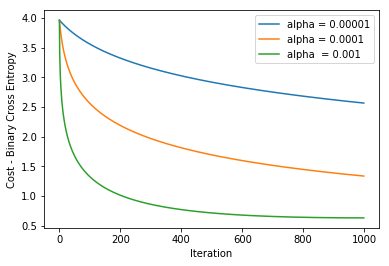

In [88]:
index = range(1000)
plt.plot(index, BCEloss1, label = 'alpha = 0.00001')
plt.plot(index, BCEloss2, label = 'alpha = 0.0001')
plt.plot(index, BCEloss3, label = 'alpha  = 0.001')
plt.xlabel('Iteration')
plt.ylabel('Cost - Binary Cross Entropy')
plt.legend(loc = 'best')
plt.legend()
plt.show()

## 2. Hinge Loss

In [0]:
# Conerting class labels from 0 to -1 for Hinge Loss
Y[Y == 0] = -1

In [0]:
def update_weights_Hinge(m1, m2, b, X1, X2, Y, learning_rate):
    m1_deriv = 0
    m2_deriv = 0
    b_deriv = 0
    N = len(X1)
    for i in range(N):
        # Calculate partial derivatives
        if Y[i]*(m1*X1[i] + m2*X2[i] + b) <= 1:
          m1_deriv += -X1[i] * Y[i]
          m2_deriv += -X2[i] * Y[i]
          b_deriv += -Y[i]
        # else derivatives are zero

    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m1, m2, b

In [0]:
Hingeloss1 = []
m5_1 = 0.3
m5_2 = 0.3
b5 = -0.2
learning_rate = 0.001
for iter in range(0, 2000):
  curr_loss = 0
  for i in range(0, N1):
    if Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5) <= 1:
      curr_loss += 1 - (Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5))
      
  curr_loss /= float(N1)
  Hingeloss1.append(curr_loss)
  m5_1, m5_2, b5 = update_weights_Hinge(m5_1, m5_2, b5, X1, X2, Y, learning_rate)

In [0]:
Hingeloss2 = []
m5_1 = 0.3
m5_2 = 0.3
b5 = -0.2
learning_rate = 0.01
for iter in range(0, 2000):
  curr_loss = 0
  for i in range(0, N1):
    if Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5) <= 1:
      curr_loss += 1 - (Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5))
      
  curr_loss /= float(N1)
  Hingeloss2.append(curr_loss)
  m5_1, m5_2, b5 = update_weights_Hinge(m5_1, m5_2, b5, X1, X2, Y, learning_rate)

In [0]:
Hingeloss3 = []
m5_1 = 0.3
m5_2 = 0.3
b5 = -0.2
learning_rate = 0.1
N1 = len(X1)
for iter in range(0, 2000):
  curr_loss = 0
  for i in range(0, N):
    if Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5) <= 1:
      curr_loss += 1 - (Y[i]* (m5_1*X1[i] + m5_2*X2[i] + b5))
      
  curr_loss /= float(N1)
  Hingeloss3.append(curr_loss)
  m5_1, m5_2, b5 = update_weights_Hinge(m5_1, m5_2, b5, X1, X2, Y, learning_rate)

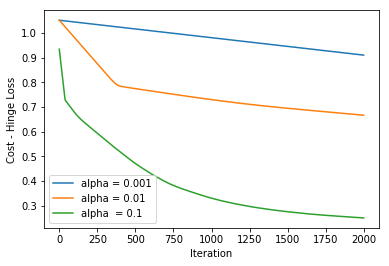

In [94]:
index = range(2000)
plt.plot(index, Hingeloss1, label = 'alpha = 0.001')
plt.plot(index, Hingeloss2, label = 'alpha = 0.01')
plt.plot(index, Hingeloss3, label = 'alpha  = 0.1')
plt.xlabel('Iteration')
plt.ylabel('Cost - Hinge Loss')
plt.legend(loc = 'best')
plt.legend()
plt.show()

# Multi-Class Classification Loss

In [95]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.feature_names)
print(iris_dataset.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.

In [96]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [97]:
data2 = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data2['Class'] = iris_dataset.target
print(data2.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Class
0                5.1               3.5  ...               0.2      0
1                4.9               3.0  ...               0.2      0
2                4.7               3.2  ...               0.2      0
3                4.6               3.1  ...               0.2      0
4                5.0               3.6  ...               0.2      0

[5 rows x 5 columns]


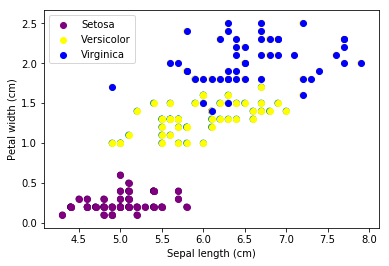

In [98]:
plt.scatter(data2['sepal length (cm)'], data2['petal width (cm)'], c = data2['Class'])
setosa = plt.scatter(data2[data2['Class'] == 0]['sepal length (cm)'], data2[data2['Class'] == 0]['petal width (cm)'], color = 'purple')
versicolor = plt.scatter(data2[data2['Class'] == 1]['sepal length (cm)'], data2[data2['Class'] == 1]['petal width (cm)'], color = 'yellow')
virginica = plt.scatter(data2[data2['Class'] == 2]['sepal length (cm)'], data2[data2['Class'] == 2]['petal width (cm)'], color = 'blue')
plt.legend((setosa, versicolor, virginica),
           ('Setosa', 'Versicolor', 'Virginica'),
           scatterpoints=1,
           loc='best',
           )
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

In [99]:
dataX = data2.loc[:, ['sepal length (cm)', 'petal width (cm)']]
target = data2['Class'].as_matrix().reshape(-1, 1)
N2 = len(dataX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
# We scale the values because otherwise the parameters will be very small
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataX = scaler.fit_transform(dataX)

In [101]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
enc = LabelEncoder()
enc.fit(target)
enc_y = enc.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(enc_y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [0]:
# set seed for reproducible results
np.random.seed(33)

## 1. Multi Class Cross Entropy Loss

In [0]:
# alpha = 0.0001 as given in the lr parameter in SGD() optimizer

# build the model
model_alpha1 = Sequential()
model_alpha1.add(Dense(50, input_dim=2, activation='relu'))
model_alpha1.add(Dense(3, activation='softmax'))

# compile the model
opt_alpha1 = SGD(lr=0.001, momentum=0.9)
model_alpha1.compile(loss='categorical_crossentropy', optimizer=opt_alpha1, metrics=['accuracy'])

# fit the model
history_alpha1 = model_alpha1.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

In [0]:
model_alpha2 = Sequential()
model_alpha2.add(Dense(50, input_dim=2, activation='relu'))
model_alpha2.add(Dense(3, activation='softmax'))
opt_alpha2 = SGD(lr=0.01, momentum=0.9)
model_alpha2.compile(loss='categorical_crossentropy', optimizer=opt_alpha1, metrics=['accuracy'])
history_alpha2 = model_alpha2.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

In [0]:
model_alpha3 = Sequential()
model_alpha3.add(Dense(50, input_dim=2, activation='relu'))
model_alpha3.add(Dense(3, activation='softmax'))
opt_alpha3 = SGD(lr=0.1, momentum=0.9)
model_alpha3.compile(loss='categorical_crossentropy', optimizer=opt_alpha1, metrics=['accuracy'])
history_alpha3 = model_alpha3.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

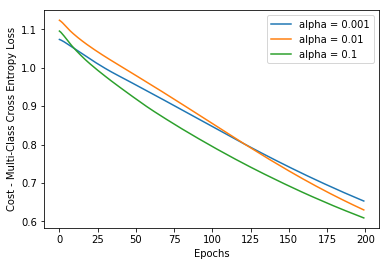

In [141]:
plt.plot(history_alpha1.history['val_loss'], label = 'alpha = 0.001')
plt.plot(history_alpha2.history['val_loss'], label = 'alpha = 0.01')
plt.plot(history_alpha3.history['val_loss'], label = 'alpha = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Cost - Multi-Class Cross Entropy Loss')
plt.legend(loc = 'best')
plt.show()

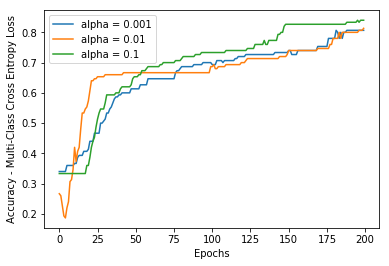

In [142]:
plt.plot(history_alpha1.history['val_acc'], label = 'alpha = 0.001')
plt.plot(history_alpha2.history['val_acc'], label = 'alpha = 0.01')
plt.plot(history_alpha3.history['val_acc'], label = 'alpha = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy - Multi-Class Cross Entropy Loss')
plt.legend(loc = 'best')
plt.show()

## 2. KL Divergence

In [0]:
# alpha = 0.0001 as given in the lr parameter in SGD() optimizer

# build the model
model_alpha1 = Sequential()
model_alpha1.add(Dense(50, input_dim=2, activation='relu'))
model_alpha1.add(Dense(3, activation='softmax'))

# compile the model
opt_alpha1 = SGD(lr=0.001, momentum=0.9)
model_alpha1.compile(loss='kullback_leibler_divergence', optimizer=opt_alpha1, metrics=['accuracy'])

# fit the model
history_alpha1 = model_alpha1.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

In [0]:
model_alpha2 = Sequential()
model_alpha2.add(Dense(50, input_dim=2, activation='relu'))
model_alpha2.add(Dense(3, activation='softmax'))
opt_alpha2 = SGD(lr=0.01, momentum=0.9)
model_alpha2.compile(loss='kullback_leibler_divergence', optimizer=opt_alpha1, metrics=['accuracy'])
history_alpha2 = model_alpha2.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

In [0]:
model_alpha3 = Sequential()
model_alpha3.add(Dense(50, input_dim=2, activation='relu'))
model_alpha3.add(Dense(3, activation='softmax'))
opt_alpha3 = SGD(lr=0.1, momentum=0.9)
model_alpha3.compile(loss='kullback_leibler_divergence', optimizer=opt_alpha1, metrics=['accuracy'])
history_alpha3 = model_alpha3.fit(dataX, dummy_y, validation_data=(dataX, dummy_y), epochs=200, verbose=0)

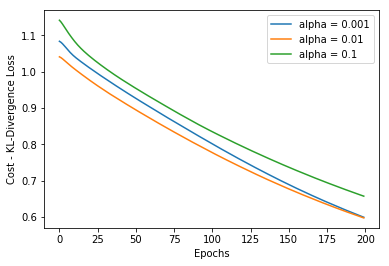

In [146]:
plt.plot(history_alpha1.history['val_loss'], label = 'alpha = 0.001')
plt.plot(history_alpha2.history['val_loss'], label = 'alpha = 0.01')
plt.plot(history_alpha3.history['val_loss'], label = 'alpha = 0.1')
plt.legend(loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Cost - KL-Divergence Loss')
plt.show()

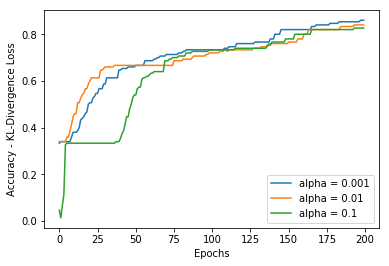

In [149]:
plt.plot(history_alpha1.history['val_acc'], label = 'alpha = 0.001')
plt.plot(history_alpha2.history['val_acc'], label = 'alpha = 0.01')
plt.plot(history_alpha3.history['val_acc'], label = 'alpha = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy - KL-Divergence Loss')
plt.legend(loc = 'best')
plt.show()